<h1>Loading ratings data</h1>

In [62]:
import numpy as np
import pandas as pd
import os
import sys
import pickle
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
%matplotlib inline

In [63]:
cwd = os.getcwd()
ratings = pd.read_csv(os.path.join(cwd,'ml-latest-small/ratings.csv'))
ratings.drop('timestamp',axis=1,inplace=True)
movies = pd.read_csv(os.path.join(cwd,'ml-latest-small/movies.csv'))

In [64]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
ratings = pd.merge(left=movies,right=ratings, on='movieId', how='right')
ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0
2,6,Heat (1995),Action|Crime|Thriller,1,4.0
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0


<h1>Explore Popular and Niche Movies</h1>

In [66]:
popularity = pd.DataFrame(ratings[['userId','title','movieId']].groupby(['title','movieId']).agg('count'))
popularity.head()

,,userId
title,movieId,
'71 (2014),117867,1
'Hellboy': The Seeds of Creation (2004),97757,1
'Round Midnight (1986),26564,2
'Salem's Lot (2004),27751,1
'Til There Was You (1997),779,2


In [67]:
popularity.reset_index(inplace=True)
popularity.columns = ['title','movieId','ratings_count']
popularity.sort_values('ratings_count',ascending=False, inplace=True)
### don't re run, need to run all

,title,movieId,ratings_count
3161,Forrest Gump (1994),356,329
7597,"Shawshank Redemption, The (1994)",318,317
6868,Pulp Fiction (1994),296,307
7684,"Silence of the Lambs, The (1991)",593,279
5515,"Matrix, The (1999)",2571,278


In [68]:
popularity.head() 

,title,movieId,ratings_count
3161,Forrest Gump (1994),356,329
7597,"Shawshank Redemption, The (1994)",318,317
6868,Pulp Fiction (1994),296,307
7684,"Silence of the Lambs, The (1991)",593,279
5515,"Matrix, The (1999)",2571,278


In [69]:
popularity.sample(10)

,title,movieId,ratings_count
2569,Dragonheart (1996),653,65
5069,Life as a House (2001),4880,9
2365,Devil (2010),80846,2
7070,Repo Man (1984),1965,21
7748,Slacker (1991),6978,4
5394,"Man Who Knew Too Much, The (1934)",2212,3
6119,"Nightmare Before Christmas, The (1993)",551,93
9566,"Woman, The (2011)",88272,2
3180,Fracchia contro Dracula (1985),139994,1
1665,"Change-Up, The (2011)",88785,10


In [71]:
popularity.query('title == "Primer (2004)"')

,title,movieId,ratings_count
6802,Primer (2004),8914,17


In [74]:
popularity.query('title == "Inception (2010)"')

,title,movieId,ratings_count
4326,Inception (2010),79132,143


In [76]:
popularity.query('title == "Lord of the Rings: The Fellowship of the Ring, The (2001)"')

,title,movieId,ratings_count
5207,"Lord of the Rings: The Fellowship of the Ring,...",4993,198


In [78]:
popularity.query('title == "Grease (1978)"')

,title,movieId,ratings_count
3606,Grease (1978),1380,68


In [79]:
popularity.query('title == "Zodiac (2007)"')

,title,movieId,ratings_count
9700,Zodiac (2007),51540,38


In [81]:
popularity.query('title == "Shattered Glass (2003)"')

,title,movieId,ratings_count
7594,Shattered Glass (2003),6932,7


In [83]:
popularity.query('title == "Samsara (2001)"')

,title,movieId,ratings_count


In [85]:
sample_movies = popularity[popularity['title'].isin(["Primer (2004)", "Inception (2010)", "Lord of the Rings: The Fellowship of the Ring, The (2001)"])]
sample_movies

,title,movieId,ratings_count
5207,"Lord of the Rings: The Fellowship of the Ring,...",4993,198
4326,Inception (2010),79132,143
6802,Primer (2004),8914,17


<AxesSubplot:xlabel='title', ylabel='ratings_count'>

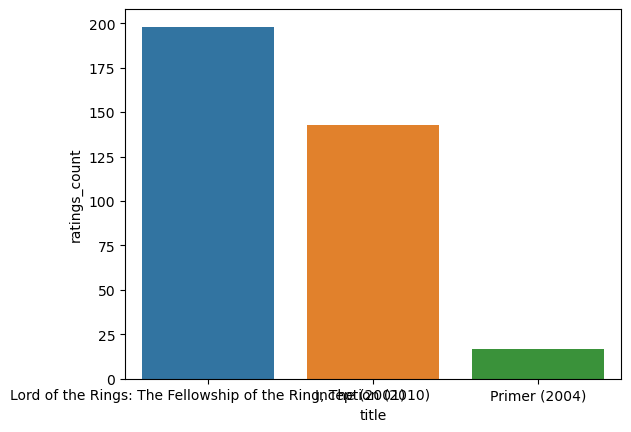

In [87]:
sns.barplot(x=sample_movies.title,y=sample_movies.ratings_count) 

<h1>Long Tail</h1>

In [89]:
long_tail_data = popularity.copy()
long_tail_data = long_tail_data.sort_values('ratings_count', ascending=False)
print(long_tail_data.shape)
print(len(long_tail_data.movieId.unique()))
long_tail_data.head()

(9724, 3)
9724


,title,movieId,ratings_count
3161,Forrest Gump (1994),356,329
7597,"Shawshank Redemption, The (1994)",318,317
6868,Pulp Fiction (1994),296,307
7684,"Silence of the Lambs, The (1991)",593,279
5515,"Matrix, The (1999)",2571,278


/home/applify/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


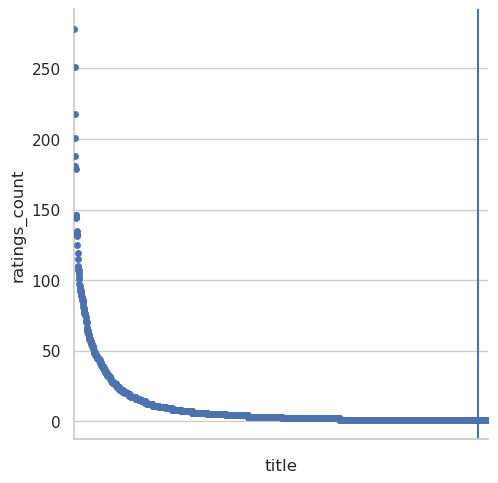

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

long_tail_plot_data = long_tail_data.sample(2000)
long_tail_plot_data = long_tail_plot_data.sort_values('ratings_count', ascending=False)


g = sns.catplot(x="title", y="ratings_count", data=long_tail_plot_data)
g.set(xticklabels=[])
plt.axvline(x=1949)
plt.show()
g.savefig("long_tail.png")